**MULTIPLE LINEAR REGRESSION MODEL FOR WEIGHT ESTIMATION FROM MEASUREMENTS OF THE FISH**

The aim of this study is to estimate weight of the fish indivuduals from their measurements through using linear regression model.

This study can be improved to use in fish farms. Individual fish swimming in front of the camera can be measured from the video image and the weight of the fish can be estimated through the linear regression model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.

**1. UNDERSTANDING THE DATASET**

In [2]:
data = pd.read_csv('./Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042
61,Parkki,55.0,13.5,14.7,16.5,6.8475,2.3265
69,Parkki,200.0,21.2,23.0,25.8,10.3458,3.6636
104,Perch,265.0,25.4,27.5,28.9,7.0516,4.3350
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
144,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
16,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854


**Meanings of the Columns:**
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

I will use independent variables (measurements of the fish) to estimate dependent variable (weight of the fish). 

**Changing the Column Names:**

In [3]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Species      156 non-null object
Weight       156 non-null float64
LengthVer    156 non-null float64
LengthDia    156 non-null float64
LengthCro    156 non-null float64
Height       156 non-null float64
Width        156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.6+ KB


**Investigating Missing Values:**

In [6]:
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


**Different Species and Their Counts:**

In [7]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Smelt,Pike,Parkki,Whitefish
Species,56,35,20,14,14,11,6


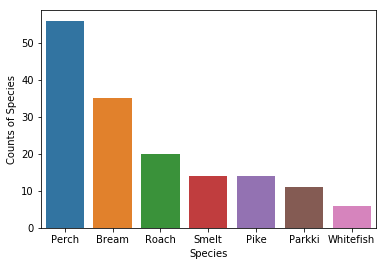

In [8]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

**Correlation of the Variables:**

In [9]:
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.905642,0.909004,0.914470,0.764671,0.900629
LengthVer,0.905642,1.000000,0.999453,0.991156,0.661376,0.878840
LengthDia,0.909004,0.999453,1.000000,0.993457,0.676755,0.885308
LengthCro,0.914470,0.991156,0.993457,1.000000,0.739748,0.887787
Height,0.764671,0.661376,0.676755,0.739748,1.000000,0.800082
Width,0.900629,0.878840,0.885308,0.887787,0.800082,1.000000


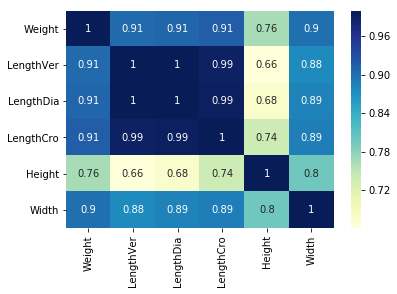

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

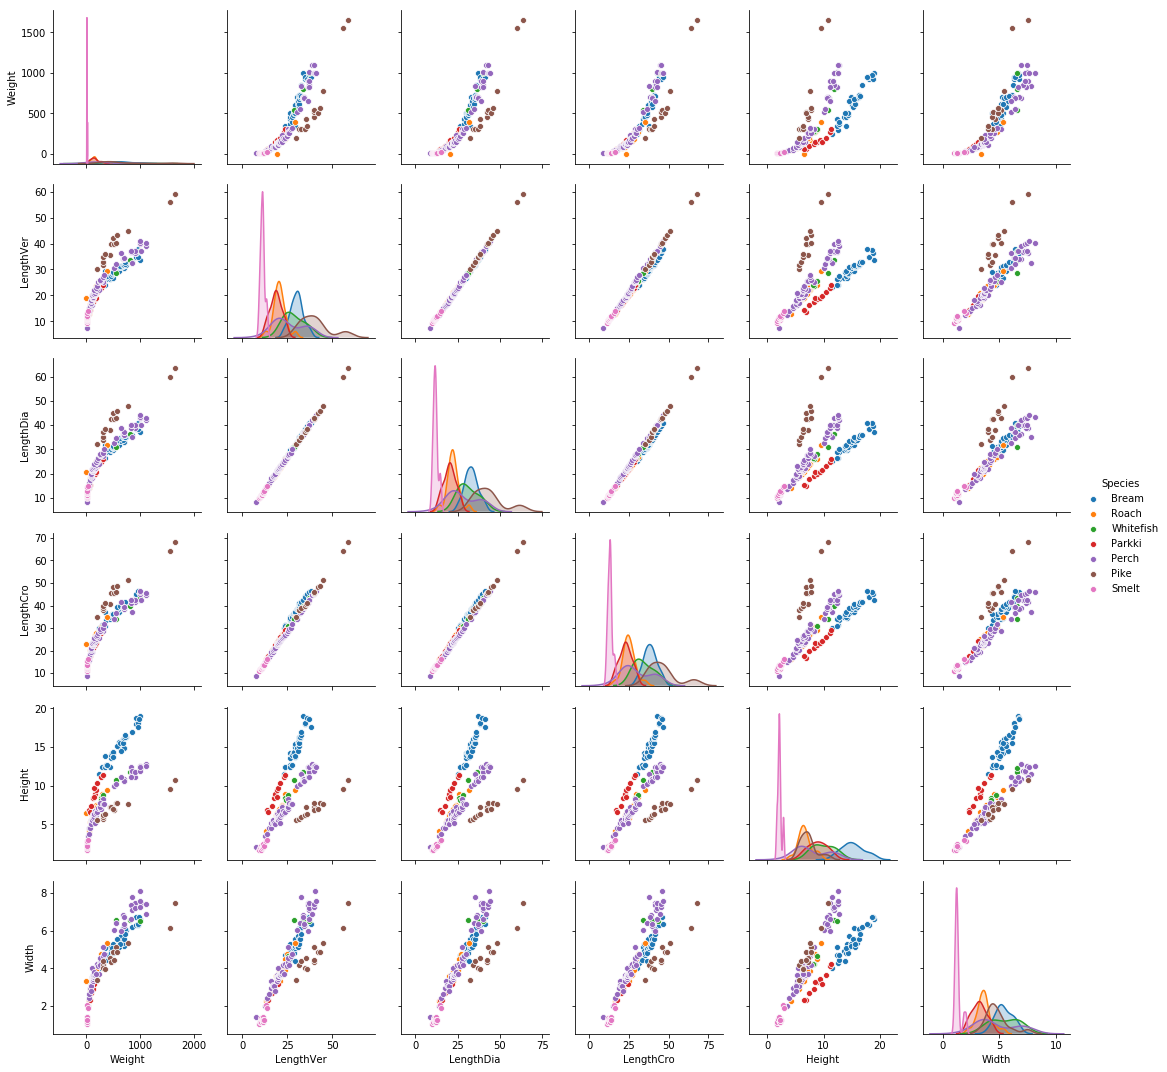

In [11]:
g = sns.pairplot(df, kind='scatter', hue='Species');

**Basic Statistics of the Dataset:**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,381.627564,338.213973,0.0000,120.000000,271.0000,612.500000,1650.000
LengthVer,156.0,25.750000,9.406734,7.5000,19.000000,25.0000,32.125000,59.000
LengthDia,156.0,27.887179,10.096462,8.4000,21.000000,26.7500,35.000000,63.400
LengthCro,156.0,30.681410,11.012285,8.8000,23.025000,29.2500,39.425000,68.000
Height,156.0,8.956253,4.324973,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.378719,1.677447,1.0476,3.369600,4.2433,5.424375,8.142


**Analysing and Dealing with Outliers**

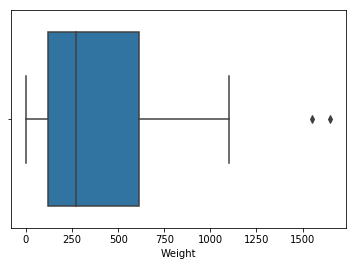

In [13]:
sns.boxplot(x=df['Weight']);

In [14]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [15]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

140    1550.0
141    1650.0
Name: Weight, dtype: float64

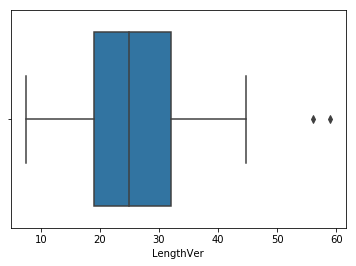

In [16]:
sns.boxplot(x=df['LengthVer']);

In [17]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

140    56.0
141    59.0
Name: LengthVer, dtype: float64

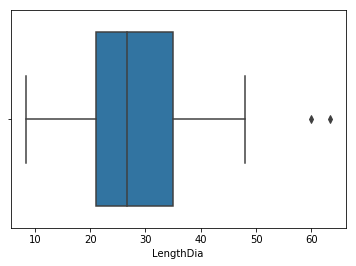

In [18]:
sns.boxplot(x=df['LengthDia']);

In [19]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

140    60.0
141    63.4
Name: LengthDia, dtype: float64

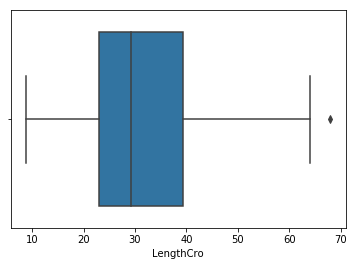

In [20]:
sns.boxplot(x=df['LengthCro']);

In [21]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

141    68.0
Name: LengthCro, dtype: float64

**Outliers of the Dataset:**

In [22]:
df[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
143,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
144,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484


In our dataset, index number 142, 143 and 144 are the outliers.

In this study I am going to erase these 3 data entries from my dataset.

**Reanalysing Basic Statistics After Eliminating Outliers**

In [23]:
df1 = df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,153.0,388.971895,337.376747,0.0000,125.0000,273.0000,620.0000,1650.000
LengthVer,153.0,26.062745,9.225564,7.5000,19.3000,25.2000,32.5000,59.000
LengthDia,153.0,28.232026,9.885520,8.4000,21.0000,27.3000,35.0000,63.400
LengthCro,153.0,31.060784,10.776261,8.8000,23.2000,29.4000,39.5000,68.000
Height,153.0,9.096316,4.248235,1.9782,6.1100,7.7860,12.3808,18.957
Width,153.0,4.442641,1.629552,1.1484,3.4075,4.2485,5.5695,8.142


**2. PREPARING THE MACHINE LEARNING MODEL:**

**Separating Dependant and Independant Variables**

In [24]:
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]

**Dividing Dataset into Train and Test Datasets**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (122, 5)
y_train:  (122,)
X_test:  (31, 5)
y_test:  (31,)


**Multiple Linear Regression Formula:**

y = b0 + b1*X1 + b2*X2 + b3*X3 + ... + bn*Xn

y : Dependent variable

b0 : Constant

b1 - bn : Coefficients

X1 - Xn : Independent variables

**Sklearn Library Linear Regression Model:**

I will train my model by using training dataset.

In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**My Model's Linear Regression Formula:**

In [28]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -487.93933373118534
Model coefficients:  [ 60.79776897  -6.64647731 -30.41827056  26.27240771  42.33318112]


In [29]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -487.94 + 60.80*X1 -6.65*X2 -30.42*X3 + 26.27*X4 + 42.33*X5


**3. PREDICTIONS BY USING THE MODEL**

**Predicting Weights from Train Dataset:**

In [30]:
y_head = reg.predict(X_train)

**Analysing the Success of the Model from Train Dataset and Predictions:**

In [31]:
r2_score(y_train, y_head)

0.8844020421075821

But if we change random_state our train and test samples will be different and our model's score will be different. 
In order to eliminate this change I will use cross validation:

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.88124272 0.88213692 0.83464813 0.8868208  0.95220277 0.81130619
 0.91482898 0.83423839 0.88299965 0.77091451]


There are 10 different versions of r2 scores using my model (reg). If I get the average of this I can achieve cross validated r2 score of my training model:

In [33]:
cross_val_score_train.mean()

0.8651339046232565

**Using Trained Model and Test Dataset to Estimate Weights:**

In [34]:
y_pred = reg.predict(X_test)

**Analysing the Success of the Trained Model from Test Dataset and Predictions:**

In [35]:
print(r2_score(y_test, y_pred))

0.9049492691273708


**4. VISUALISATION OF THE PREDICTIONS:**

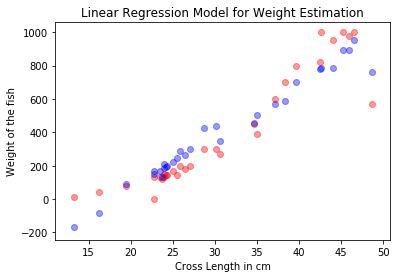

In [36]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

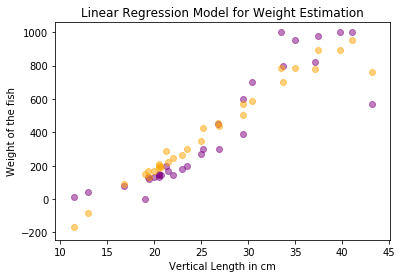

In [37]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

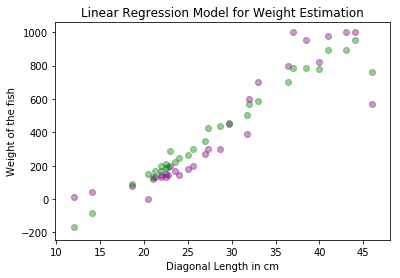

In [38]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

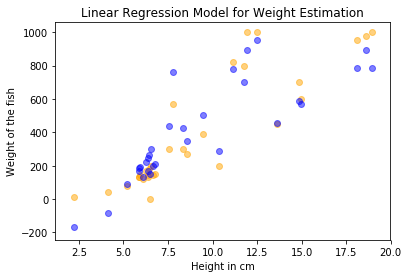

In [39]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

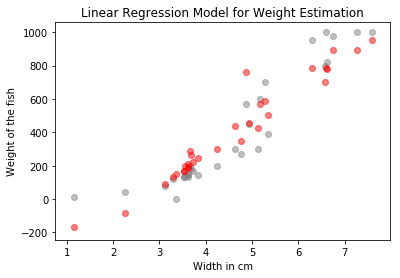

In [40]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

**5. COMPARING REAL AND PREDICTED WEIGHTS**

In [41]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,701.726633
1,892.424537
2,290.213928
3,950.577784
4,787.159896


In [42]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,800.0
1,975.0
2,200.0
3,1000.0
4,955.0


In [43]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,800.0,701.726633
1,975.0,892.424537
2,200.0,290.213928
3,1000.0,950.577784
4,955.0,787.159896
5,300.0,436.689504
6,145.0,243.841246
7,600.0,567.052642
8,272.0,348.934587
9,145.0,197.506640


From the results above, one can see there is a tendency towards errorous estimations when the weight is small. 

I hope you enjoy this study and I would appreciate if you add your comments below.

Melih Akdağ